# 1. Import necessary libraries

In [1]:
import math 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw, PandasTools
from rdkit.Chem.MolStandardize import rdMolStandardize

-  Here, we imported libraries required for data manipulation (pandas), numerical operations (numpy), and visualization (matplotlib and seaborn)
- RDKit is used in chemoinformatics tasks such as molecule standardization, descriptor calculations, and adding a ROMol column to the dataframe

# 2. Load Dataset 

In [2]:
df = pd.read_csv('D:\\MachineLearning\\table_1.csv', index_col='Unnamed: 0')
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 292
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   canonical_smiles    293 non-null    object 
 1   molecule_chembl_id  293 non-null    object 
 2   standard_units      293 non-null    object 
 3   standard_value      293 non-null    float64
 4   pIC50               293 non-null    float64
 5   ROMol               293 non-null    object 
dtypes: float64(2), object(4)
memory usage: 16.0+ KB


,canonical_smiles,molecule_chembl_id,standard_units,standard_value,pIC50,ROMol
0,OCCN1CCN(CCCN2c3ccccc3Sc3ccc(Cl)cc32)CC1,CHEMBL567,nM,0.300,9.522879,<rdkit.Chem.rdchem.Mol object at 0x000001186AC...
1,CC(C)(C)[C@]1(O)CCN2C[C@H]3c4ccccc4CCc4cccc(c4...,CHEMBL8514,nM,1.100,8.958607,<rdkit.Chem.rdchem.Mol object at 0x000001186AC...
2,CC(C)(C)[C@]1(O)CCN2C[C@@H]3c4ccccc4CCc4cccc(c...,CHEMBL3885419,nM,1.100,8.958607,<rdkit.Chem.rdchem.Mol object at 0x000001186AC...
3,O=C(CCCN1CCC2(CC1)C(=O)NCN2c1ccccc1)c1ccc(F)cc1,CHEMBL267930,nM,1.270,8.896196,<rdkit.Chem.rdchem.Mol object at 0x000001186AC...
4,CC(C)[C@@]1(NC(=O)[C@@H]2C[C@@H]3c4cccc5[nH]cc...,CHEMBL1255837,nM,1.474,8.831503,<rdkit.Chem.rdchem.Mol object at 0x000001186AC...
5,CC(C)C[C@H]1C(=O)N2CCC[C@H]2[C@]2(O)O[C@](NC(=...,CHEMBL493,nM,1.582,8.800794,<rdkit.Chem.rdchem.Mol object at 0x000001186AC...
6,OCCN1CCN(CCCN2c3ccccc3Sc3ccc(C(F)(F)F)cc32)CC1,CHEMBL726,nM,1.616,8.791559,<rdkit.Chem.rdchem.Mol object at 0x000001186AC...
7,CN(C)C(=O)N[C@H]1CC[C@H](CCN2CCN(c3cccc(Cl)c3C...,CHEMBL2028019,nM,1.700,8.769551,<rdkit.Chem.rdchem.Mol object at 0x000001186AC...
8,CC(C)(C)NS(=O)(=O)c1ccc(-c2sc(C(=O)N[C@H]3C[C@...,CHEMBL4128926,nM,1.800,8.744727,<rdkit.Chem.rdchem.Mol object at 0x000001186AC...
9,CCN1CCC[C@H]1CNC(=O)c1c(O)c(Cl)cc(Cl)c1OC,CHEMBL8809,nM,1.830,8.737549,<rdkit.Chem.rdchem.Mol object at 0x000001186AC...


- Load the dataset from a csv file "table_1.csv', specifying the index column if necessary
- *df.info()* shows the structure, data types and non-null values in each column, which is helfpul for identifying any preprocessing needs e.g. missing values, type issues
- *df.head()* displays the first 20 rows to get a sens of the data

# 3. Standardize SMILES Notation

In [3]:
smiles_column = "canonical_smiles"

def preprocessSmiles(row):
    
    
    """
    Applied from: https://bitsilla.com/blog/2021/06/standardizing-a-molecule-using-rdkit/
    
    Standardize SMILES strings by:
    - Cleaning up the molecule (removing unwanted groups)
    - Identifying the main molecular fragment (parent molecule)
    - Neutralizing charges
    - Canonicalizing tautomers
    
    """
    mol = Chem.MolFromSmiles(row[smiles_column])
    clean_mol = rdMolStandardize.Cleanup(mol)
    parent_mol = rdMolStandardize.FragmentParent(clean_mol)
    neut_charge = rdMolStandardize.Uncharger()
    neut_mols = neut_charge.uncharge(parent_mol)
    
    taut_en = rdMolStandardize.TautomerEnumerator()
    taut_uncharged_parent_clean_mol = taut_en.Canonicalize(neut_mols)
    
    standardized_smiles= Chem.MolToSmiles(taut_uncharged_parent_clean_mol,isomericSmiles=True)
    
    return standardized_smiles
    

 This process aims to ensure consistency in SMILES representation, crucial for accurately comparing molecules

In [4]:
df['preprocessed_smiles'] = df.apply(preprocessSmiles, axis=1)
df.to_csv('D:\\MachineLearning\\table_2.csv')
PandasTools.AddMoleculeColumnToFrame(df, "preprocessed_smiles")

[11:36:12] Initializing MetalDisconnector
[11:36:12] Running MetalDisconnector
[11:36:12] Initializing Normalizer
[11:36:12] Running Normalizer
[11:36:12] Initializing MetalDisconnector
[11:36:12] Running MetalDisconnector
[11:36:12] Initializing Normalizer
[11:36:12] Running Normalizer
[11:36:12] Running LargestFragmentChooser
[11:36:12] Fragment: OCCN1CCN(CCCN2c3ccccc3Sc3ccc(Cl)cc32)CC1
[11:36:12] New largest fragment: OCCN1CCN(CCCN2c3ccccc3Sc3ccc(Cl)cc32)CC1 (53)
[11:36:12] Running Uncharger
[11:36:12] Initializing MetalDisconnector
[11:36:12] Running MetalDisconnector
[11:36:12] Initializing Normalizer
[11:36:12] Running Normalizer
[11:36:12] Initializing MetalDisconnector
[11:36:12] Running MetalDisconnector
[11:36:12] Initializing Normalizer
[11:36:12] Running Normalizer
[11:36:12] Running LargestFragmentChooser
[11:36:12] Fragment: CC(C)(C)[C@]1(O)CCN2C[C@H]3c4ccccc4CCc4cccc(c43)[C@@H]2C1
[11:36:12] New largest fragment: CC(C)(C)[C@]1(O)CCN2C[C@H]3c4ccccc4CCc4cccc(c43)[C@@H]2C1 

[11:36:13] Fragment: COc1ccccc1N1CCN(CCCCCCNC(=O)OC(C)(C)C)CC1
[11:36:13] New largest fragment: COc1ccccc1N1CCN(CCCCCCNC(=O)OC(C)(C)C)CC1 (65)
[11:36:13] Running Uncharger
[11:36:13] Initializing MetalDisconnector
[11:36:13] Running MetalDisconnector
[11:36:13] Initializing Normalizer
[11:36:13] Running Normalizer
[11:36:13] Initializing MetalDisconnector
[11:36:13] Running MetalDisconnector
[11:36:13] Initializing Normalizer
[11:36:13] Running Normalizer
[11:36:13] Running LargestFragmentChooser
[11:36:13] Fragment: O=C(CCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1
[11:36:13] New largest fragment: O=C(CCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1 (49)
[11:36:13] Running Uncharger
[11:36:13] Initializing MetalDisconnector
[11:36:13] Running MetalDisconnector
[11:36:13] Initializing Normalizer
[11:36:13] Running Normalizer
[11:36:13] Initializing MetalDisconnector
[11:36:13] Running MetalDisconnector
[11:36:13] Initializing Normalizer
[11:36:13] Running Normalizer
[11:36:13] Running LargestFragme

[11:36:16] Tautomer enumeration stopped at 892 tautomers: max transforms reached
[11:36:16] Initializing MetalDisconnector
[11:36:16] Running MetalDisconnector
[11:36:16] Initializing Normalizer
[11:36:16] Running Normalizer
[11:36:16] Initializing MetalDisconnector
[11:36:16] Running MetalDisconnector
[11:36:16] Initializing Normalizer
[11:36:16] Running Normalizer
[11:36:16] Running LargestFragmentChooser
[11:36:16] Fragment: O=C(NCCC(O)CN1CCN(c2cccc(Cl)c2Cl)CC1)c1ccc(-c2ccccn2)cc1
[11:36:16] New largest fragment: O=C(NCCC(O)CN1CCN(c2cccc(Cl)c2Cl)CC1)c1ccc(-c2ccccn2)cc1 (62)
[11:36:16] Running Uncharger
[11:36:16] Initializing MetalDisconnector
[11:36:16] Running MetalDisconnector
[11:36:16] Initializing Normalizer
[11:36:16] Running Normalizer
[11:36:16] Initializing MetalDisconnector
[11:36:16] Running MetalDisconnector
[11:36:16] Initializing Normalizer
[11:36:16] Running Normalizer
[11:36:16] Running LargestFragmentChooser
[11:36:16] Fragment: Br
[11:36:16] New largest fragment: 

[11:36:16] Fragment: Br
[11:36:16] New largest fragment: Br (2)
[11:36:16] Fragment: Cc1ccc(N2CCN(C[C@H]3C[C@@H]3c3ccccc3)CC2)c(C)c1
[11:36:16] New largest fragment: Cc1ccc(N2CCN(C[C@H]3C[C@@H]3c3ccccc3)CC2)c(C)c1 (52)
[11:36:16] Running Uncharger
[11:36:16] Initializing MetalDisconnector
[11:36:16] Running MetalDisconnector
[11:36:16] Initializing Normalizer
[11:36:16] Running Normalizer
[11:36:16] Initializing MetalDisconnector
[11:36:16] Running MetalDisconnector
[11:36:16] Initializing Normalizer
[11:36:16] Running Normalizer
[11:36:16] Running LargestFragmentChooser
[11:36:16] Fragment: COc1ccc2c(c1OC)-c1ccc(Br)c3c1[C@@H](C2)N(C)CC3
[11:36:16] New largest fragment: COc1ccc2c(c1OC)-c1ccc(Br)c3c1[C@@H](C2)N(C)CC3 (43)
[11:36:16] Running Uncharger
[11:36:16] Initializing MetalDisconnector
[11:36:16] Running MetalDisconnector
[11:36:16] Initializing Normalizer
[11:36:16] Running Normalizer
[11:36:16] Initializing MetalDisconnector
[11:36:16] Running MetalDisconnector
[11:36:16] Initia

[11:36:17] Running LargestFragmentChooser
[11:36:17] Fragment: Br
[11:36:17] New largest fragment: Br (2)
[11:36:17] Fragment: Cc1ccc(N2CCN(C[C@@H]3C[C@H]3c3ccccc3)CC2)c(C)c1
[11:36:17] New largest fragment: Cc1ccc(N2CCN(C[C@@H]3C[C@H]3c3ccccc3)CC2)c(C)c1 (52)
[11:36:17] Running Uncharger
[11:36:17] Initializing MetalDisconnector
[11:36:17] Running MetalDisconnector
[11:36:17] Initializing Normalizer
[11:36:17] Running Normalizer
[11:36:17] Initializing MetalDisconnector
[11:36:17] Running MetalDisconnector
[11:36:17] Initializing Normalizer
[11:36:17] Running Normalizer
[11:36:17] Running LargestFragmentChooser
[11:36:17] Fragment: Fc1ccc(N2CCN(CC[C@H]3CC[C@H](Nc4ncccn4)CC3)CC2)cc1
[11:36:17] New largest fragment: Fc1ccc(N2CCN(CC[C@H]3CC[C@H](Nc4ncccn4)CC3)CC2)cc1 (58)
[11:36:17] Running Uncharger
[11:36:17] Initializing MetalDisconnector
[11:36:17] Running MetalDisconnector
[11:36:17] Initializing Normalizer
[11:36:17] Running Normalizer
[11:36:17] Initializing MetalDisconnector
[11:

[11:36:17] Initializing MetalDisconnector
[11:36:17] Running MetalDisconnector
[11:36:17] Initializing Normalizer
[11:36:17] Running Normalizer
[11:36:17] Initializing MetalDisconnector
[11:36:17] Running MetalDisconnector
[11:36:17] Initializing Normalizer
[11:36:17] Running Normalizer
[11:36:17] Running LargestFragmentChooser
[11:36:17] Fragment: CCCN(CCC)[C@@H]1Cc2cccc3c2n(c(=O)n3CCC)C1
[11:36:17] New largest fragment: CCCN(CCC)[C@@H]1Cc2cccc3c2n(c(=O)n3CCC)C1 (52)
[11:36:17] Running Uncharger
[11:36:17] Initializing MetalDisconnector
[11:36:17] Running MetalDisconnector
[11:36:17] Initializing Normalizer
[11:36:17] Running Normalizer
[11:36:17] Initializing MetalDisconnector
[11:36:17] Running MetalDisconnector
[11:36:17] Initializing Normalizer
[11:36:17] Running Normalizer
[11:36:17] Running LargestFragmentChooser
[11:36:17] Fragment: O=C(NCCCCN1CCN(c2ccnc3ccccc23)CC1)c1cn2ccccc2n1
[11:36:17] New largest fragment: O=C(NCCCCN1CCN(c2ccnc3ccccc23)CC1)c1cn2ccccc2n1 (60)
[11:36:17] Ru

[11:36:17] Fragment: Cl
[11:36:17] New largest fragment: Cl (2)
[11:36:17] Fragment: c1ccc([C@H]2C[C@@H]2CN2CCN(c3ccccn3)CC2)cc1
[11:36:17] New largest fragment: c1ccc([C@H]2C[C@@H]2CN2CCN(c3ccccn3)CC2)cc1 (45)
[11:36:17] Running Uncharger
[11:36:17] Initializing MetalDisconnector
[11:36:17] Running MetalDisconnector
[11:36:17] Initializing Normalizer
[11:36:17] Running Normalizer
[11:36:17] Initializing MetalDisconnector
[11:36:17] Running MetalDisconnector
[11:36:17] Initializing Normalizer
[11:36:17] Running Normalizer
[11:36:17] Running LargestFragmentChooser
[11:36:17] Fragment: COC(=O)CN(CC(=O)NCCOCCOCCNC(C)=O)CC(=O)NCCOCCOCCNC(=O)CCC(=O)Nc1ccc(CCN2CN(c3ccccc3)C3(CCN(CCCC(=O)c4ccc(F)cc4)CC3)C2=O)cc1
[11:36:17] New largest fragment: COC(=O)CN(CC(=O)NCCOCCOCCNC(C)=O)CC(=O)NCCOCCOCCNC(=O)CCC(=O)Nc1ccc(CCN2CN(c3ccccc3)C3(CCN(CCCC(=O)c4ccc(F)cc4)CC3)C2=O)cc1 (157)
[11:36:17] Running Uncharger
[11:36:19] Tautomer enumeration stopped at 644 tautomers: max transforms reached
[11:36:19] I

[11:36:19] Running MetalDisconnector
[11:36:19] Initializing Normalizer
[11:36:19] Running Normalizer
[11:36:19] Initializing MetalDisconnector
[11:36:20] Running MetalDisconnector
[11:36:20] Initializing Normalizer
[11:36:20] Running Normalizer
[11:36:20] Running LargestFragmentChooser
[11:36:20] Fragment: COc1cc2c(cc1O)[C@@H]1Cc3c(CO)c(OC)cc(OC)c3CN1CC2
[11:36:20] New largest fragment: COc1cc2c(cc1O)[C@@H]1Cc3c(CO)c(OC)cc(OC)c3CN1CC2 (52)
[11:36:20] Running Uncharger
[11:36:20] Initializing MetalDisconnector
[11:36:20] Running MetalDisconnector
[11:36:20] Initializing Normalizer
[11:36:20] Running Normalizer
[11:36:20] Initializing MetalDisconnector
[11:36:20] Running MetalDisconnector
[11:36:20] Initializing Normalizer
[11:36:20] Running Normalizer
[11:36:20] Running LargestFragmentChooser
[11:36:20] Fragment: O=C1NCN(c2ccccc2)C12CCN(Cc1cccc(Oc3ccccc3)c1)CC2
[11:36:20] New largest fragment: O=C1NCN(c2ccccc2)C12CCN(Cc1cccc(Oc3ccccc3)c1)CC2 (58)
[11:36:20] Running Uncharger
[11:36:20]

[11:36:20] Initializing MetalDisconnector
[11:36:20] Running MetalDisconnector
[11:36:20] Initializing Normalizer
[11:36:20] Running Normalizer
[11:36:20] Initializing MetalDisconnector
[11:36:20] Running MetalDisconnector
[11:36:20] Initializing Normalizer
[11:36:20] Running Normalizer
[11:36:20] Running LargestFragmentChooser
[11:36:20] Fragment: Cc1[nH]c(-c2ccccc2)cc1C(=O)NCCCN1CCN(c2cccc(Cl)c2Cl)CC1
[11:36:20] New largest fragment: Cc1[nH]c(-c2ccccc2)cc1C(=O)NCCCN1CCN(c2cccc(Cl)c2Cl)CC1 (60)
[11:36:20] Running Uncharger
[11:36:20] Initializing MetalDisconnector
[11:36:20] Running MetalDisconnector
[11:36:20] Initializing Normalizer
[11:36:20] Running Normalizer
[11:36:20] Initializing MetalDisconnector
[11:36:20] Running MetalDisconnector
[11:36:20] Initializing Normalizer
[11:36:20] Running Normalizer
[11:36:20] Running LargestFragmentChooser
[11:36:20] Fragment: O=C(CCCCCCCCCCC(=O)NCCCN1CCN(C2=Nc3cc(Cl)ccc3Nc3ccccc32)CC1)NCCCN1CCN(C2=Nc3cc(Cl)ccc3Nc3ccccc32)CC1
[11:36:20] New lar

[11:36:20] Initializing MetalDisconnector
[11:36:20] Running MetalDisconnector
[11:36:20] Initializing Normalizer
[11:36:20] Running Normalizer
[11:36:20] Initializing MetalDisconnector
[11:36:20] Running MetalDisconnector
[11:36:20] Initializing Normalizer
[11:36:20] Running Normalizer
[11:36:20] Running LargestFragmentChooser
[11:36:20] Fragment: COC(=O)[C@@H]1[C@H]2C[C@H]3c4[nH]c5ccccc5c4CCN3C[C@@H]2CC[C@@H]1O
[11:36:20] New largest fragment: COC(=O)[C@@H]1[C@H]2C[C@H]3c4[nH]c5ccccc5c4CCN3C[C@@H]2CC[C@@H]1O (52)
[11:36:20] Running Uncharger
[11:36:20] Initializing MetalDisconnector
[11:36:20] Running MetalDisconnector
[11:36:20] Initializing Normalizer
[11:36:20] Running Normalizer
[11:36:20] Initializing MetalDisconnector
[11:36:20] Running MetalDisconnector
[11:36:20] Initializing Normalizer
[11:36:20] Running Normalizer
[11:36:20] Running LargestFragmentChooser
[11:36:20] Fragment: O=c1[nH]c2ccccc2n1C1CCN(C2CCN(Cc3ccccc3Cl)CC2)CC1
[11:36:20] New largest fragment: O=c1[nH]c2ccccc2

[11:36:21] Initializing MetalDisconnector
[11:36:21] Running MetalDisconnector
[11:36:21] Initializing Normalizer
[11:36:21] Running Normalizer
[11:36:21] Initializing MetalDisconnector
[11:36:21] Running MetalDisconnector
[11:36:21] Initializing Normalizer
[11:36:21] Running Normalizer
[11:36:21] Running LargestFragmentChooser
[11:36:21] Fragment: Cc1ccccc1CN1CCC(N2CCC(n3c(=O)[nH]c4ccccc43)CC2)CC1
[11:36:21] New largest fragment: Cc1ccccc1CN1CCC(N2CCC(n3c(=O)[nH]c4ccccc43)CC2)CC1 (62)
[11:36:21] Running Uncharger
[11:36:21] Initializing MetalDisconnector
[11:36:21] Running MetalDisconnector
[11:36:21] Initializing Normalizer
[11:36:21] Running Normalizer
[11:36:21] Initializing MetalDisconnector
[11:36:21] Running MetalDisconnector
[11:36:21] Initializing Normalizer
[11:36:21] Running Normalizer
[11:36:21] Running LargestFragmentChooser
[11:36:21] Fragment: CN1CCN(C2=Nc3cc(Cl)ccc3N(C(=O)CCCCCCC(=O)N3c4ccc(Cl)cc4N=C(N4CCN(C)CC4)c4ccccc43)c3ccccc32)CC1
[11:36:21] New largest fragment: C

[11:36:21] Initializing MetalDisconnector
[11:36:21] Running MetalDisconnector
[11:36:21] Initializing Normalizer
[11:36:21] Running Normalizer
[11:36:21] Initializing MetalDisconnector
[11:36:21] Running MetalDisconnector
[11:36:21] Initializing Normalizer
[11:36:21] Running Normalizer
[11:36:21] Running LargestFragmentChooser
[11:36:21] Fragment: CN[C@@H]1Cc2cccc3c2n(c(=O)n3CCCCCCCCCCOCCCCc2ccccc2)C1
[11:36:21] New largest fragment: CN[C@@H]1Cc2cccc3c2n(c(=O)n3CCCCCCCCCCOCCCCc2ccccc2)C1 (81)
[11:36:21] Running Uncharger
[11:36:21] Initializing MetalDisconnector
[11:36:21] Running MetalDisconnector
[11:36:21] Initializing Normalizer
[11:36:21] Running Normalizer
[11:36:21] Initializing MetalDisconnector
[11:36:21] Running MetalDisconnector
[11:36:21] Initializing Normalizer
[11:36:21] Running Normalizer
[11:36:21] Running LargestFragmentChooser
[11:36:21] Fragment: COc1ccc(CCN2CCC(Nc3nc4ccccc4n3Cc3ccc(F)cc3)CC2)cc1
[11:36:21] New largest fragment: COc1ccc(CCN2CCC(Nc3nc4ccccc4n3Cc3ccc(

[11:36:21] Initializing MetalDisconnector
[11:36:21] Running MetalDisconnector
[11:36:21] Initializing Normalizer
[11:36:21] Running Normalizer
[11:36:21] Running LargestFragmentChooser
[11:36:21] Fragment: CCCCCCCCCC(=O)NN1c2ccc(Cl)cc2N=C(N2CCN(C)CC2)c2ccccc21
[11:36:21] New largest fragment: CCCCCCCCCC(=O)NN1c2ccc(Cl)cc2N=C(N2CCN(C)CC2)c2ccccc21 (73)
[11:36:21] Running Uncharger
[11:36:21] Initializing MetalDisconnector
[11:36:21] Running MetalDisconnector
[11:36:21] Initializing Normalizer
[11:36:21] Running Normalizer
[11:36:21] Initializing MetalDisconnector
[11:36:21] Running MetalDisconnector
[11:36:21] Initializing Normalizer
[11:36:21] Running Normalizer
[11:36:21] Running LargestFragmentChooser
[11:36:21] Fragment: NCCCCN(C[C@H]1Cc2ncccc2CN1)[C@H]1CCCc2cccnc21
[11:36:21] New largest fragment: NCCCCN(C[C@H]1Cc2ncccc2CN1)[C@H]1CCCc2cccnc21 (58)
[11:36:21] Running Uncharger
[11:36:21] Initializing MetalDisconnector
[11:36:21] Running MetalDisconnector
[11:36:21] Initializing Nor

- Apply *preprocessSmiles()* to each row, creating a new column, *preproceessed_smiles*
- Save the updated dataframe as *'table_2.csv'* and add a molecule visualization column to the dataframe for easier inspection

# 4. Generate Lipinski Descriptors

In [5]:
def generateLipinski(df):
    
    #Select relevant columns from input df
    df_out = df[['pIC50','preprocessed_smiles']].copy()

    
    #Calculate Lipinski descriptors
    
    df_out['molecular_weight'] = df['ROMol'].apply(Descriptors.ExactMolWt)
    df_out['n_hba'] = df['ROMol'].apply(Descriptors.NumHAcceptors)
    df_out['n_hbd'] = df['ROMol'].apply(Descriptors.NumHDonors)
    df_out['logp'] = df['ROMol'].apply(Descriptors.MolLogP)
    
    #Define Lipinski conditions 
    
    df_out['Lipinski_pass'] = (
        (df_out['molecular_weight']<=500).astype(int) +
        (df_out['n_hba']<=10).astype(int) +
        (df_out['n_hbd']<=5).astype(int) +
        (df_out['logp']<=5).astype(int)
    ) >=3
        
    
    return df_out
    

The *generateLipinski()* function computes descriptors based on Lipinski's Rule of Five, which suggests that orally active drugs generally have: 
- Molecular Weight <= 500
- LogP <= 5 
- No. of Hydrogen Bond Acceptors <= 10 
- No. of Hydrogen Bond Donors <= 5 

Furthermore, for a compound to pass the Lipinski rule, it must satisfy at least 3 out of these 4 conditions

In [6]:
lipinski_df = generateLipinski(df)
lipinski_df['Lipinski_pass'].value_counts()

True     260
False     33
Name: Lipinski_pass, dtype: int64

A quick overview of how many compounds pass or fail the Lipinski filter

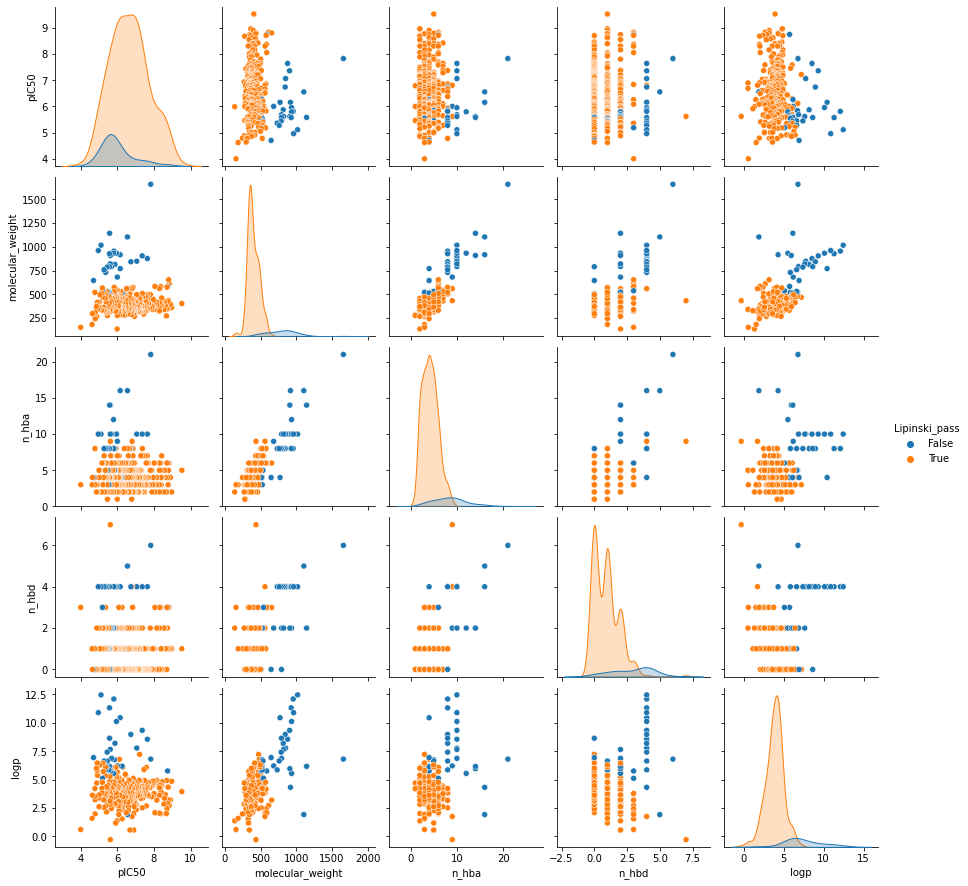

In [7]:
sns.pairplot(lipinski_df, hue = 'Lipinski_pass')

 A pairplot visualizs the relationships between descriptors (e.g. molecular weight, LogP) with color codig based on compliance to the Lipinski's rule of 5. Ths can help identify correlations or trends in descriptor values for compounds passing or failing Lipinski's rule. 

In [8]:
lipinski_df.describe()

,pIC50,molecular_weight,n_hba,n_hbd,logp
count,293.000000,293.000000,293.000000,293.000000,293.000000
mean,6.574634,441.183864,4.696246,1.112628,4.268738
std,1.061135,170.876609,2.541414,1.220941,1.723060
min,4.000000,135.068414,1.000000,0.000000,-0.294000
25%,5.762557,342.184447,3.000000,0.000000,3.370000
50%,6.471726,391.283492,4.000000,1.000000,4.150700
75%,7.259637,484.156513,6.000000,2.000000,4.826600
max,9.522879,1657.839631,21.000000,7.000000,12.453600


The *describe()* function provides summary statistics of the descriptor column. That gives isights into the distributions and typical values of molecular descriptors in the dataset, which can help identify outlies or common trends. 

In [9]:
lipinski_df.to_csv('D:\\MachineLearning\\table_3.csv')